In [3]:
import os
import time
import pandas as pd
import numpy as np
from scipy import signal

import matplotlib.pyplot as plt

In [30]:
data_offset = 0
data_len = 20000

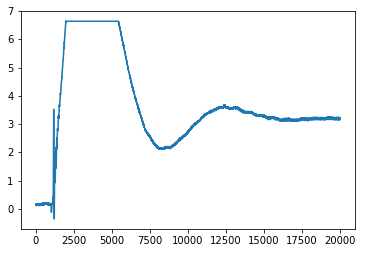

In [31]:
file_base_dir = "./data//"
file_child_dir = "IGBT4_1_edge_down/"
file_name = "2020-07-30-06-10-40 1.csv"
file = file_base_dir+file_child_dir+file_name
up_edge_df = pd.read_csv(file)
plt.plot(up_edge_df["Vce"].values[data_offset:data_offset+data_len])

### down edge 

In [32]:
from mylab.feature.myfeature import cal_feature

file_base_dir = "./data/"
file_child_dir = "IGBT4_1_edge_down/"
# file_name = "2020-01-08-20-47 (1).csv"
# file = file_base_dir+file_child_dir+file_name


all_feature_df = pd.DataFrame()
for _,_,filenames in os.walk( file_base_dir+file_child_dir ):
    for file_name in filenames:
        file = file_base_dir+file_child_dir+file_name
        up_edge_df = pd.read_csv(file)
#         b, a = signal.butter(4, 0.05, 'lowpass') 
#         v_ge_filter = signal.filtfilt(b, a, up_edge_df.Vge.values)       #data为要过滤的信号
#         a = v_ge_filter>2.5
#         m= np.array([i for i in range(len(a)-1) if a[i]==True and a[i+1] == False])  # down edge
#         data_offset = m[0]
        up_edge_df = up_edge_df.iloc[data_offset:data_offset+data_len,:]
        if up_edge_df.shape[0]==data_len: # use the full data only
            feature_df1 = cal_feature(up_edge_df,"Vce")
            feature_df2 = cal_feature(up_edge_df,"Vge")
            feature_df = pd.concat([feature_df1,feature_df2],axis = 1)
            feature_df2 = cal_feature(up_edge_df,"Ic")
            feature_df = pd.concat([feature_df,feature_df2],axis = 1)
            feature_df2 = cal_feature(up_edge_df,"Ig")
            feature_df = pd.concat([feature_df,feature_df2],axis = 1)
            
            feature_df["file_name"] = file_name
            feature_df["time"] = file_name[:19]
            feature_df["time_stamp"] = time.mktime(time.strptime(file_name[:19],"%Y-%m-%d-%H-%M-%S"))
            all_feature_df = pd.concat([all_feature_df,feature_df],axis = 0)

all_feature_df.to_csv("./temp/edge_down_features.csv",index = False)
print(all_feature_df.shape)
all_feature_df.head()
# 2020-07-08-19-37-04 

(230, 107)


Vce_min  Vce_max  Vce_range  Vce_mean  Vce_mode  Vce_median  \
0    -0.08     4.36       4.44  1.673170      1.28        1.32   
0    -0.08     4.36       4.44  1.671072      1.28        1.32   
0    -0.08     4.36       4.44  1.671228      1.28        1.32   
0    -0.08     4.32       4.40  1.671580      1.28        1.32   
0    -0.08     4.32       4.40  1.649040      1.28        1.28   

   Vce_quantile25  Vce_quantile75   Vce_std   Vce_var      ...          Ig_sf  \
0            1.24            1.64  1.049532  1.101517      ...       1.365208   
0            1.24            1.60  1.049273  1.100974      ...       1.371221   
0            1.20            1.60  1.048933  1.100261      ...       1.367640   
0            1.24            1.60  1.049722  1.101916      ...       1.380072   
0            1.24            1.48  1.037049  1.075470      ...       1.344486   

       Ig_MI      Ig_CF    Ig_llr      Ig_pi   Ig_sdif    Ig_cpt1  \
0  28.851050  18.357429 -0.018932 -54.855275  1.325907  20.545445   
0  29.973188  18.982864 -0.018746 -53.923818  1.330045  20.716762   
0  30.268107  19.313506 -0.018432 -64.944038  1.338471  20.920603   
0  29.116823  18.354466 -0.018056 -70.257611  1.356623  20.472766   
0  29.253196  19.082763 -0.019054 -62.226930  1.313970  20.219121   

                   file_name                 time    time_stamp  
0  2020-07-08-19-37-04 0.csv  2020-07-08-19-37-04  1.594208e+09  
0  2020-07-08-19-37-04 1.csv  2020-07-08-19-37-04  1.594208e+09  
0  2020-07-08-19-37-04 2.csv  2020-07-08-19-37-04  1.594208e+09  
0  2020-07-08-19-37-04 3.csv  2020-07-08-19-37-04  1.594208e+09  
0  2020-07-09-06-55-38 0.csv  2020-07-09-06-55-38  1.594249e+09  

[5 rows x 107 columns]

In [16]:
outliers_df = all_feature_df.loc[all_feature_df.Ic_llr.values < 6, :]
outliers_df.head()

Empty DataFrame
Columns: [Vce_min, Vce_max, Vce_range, Vce_mean, Vce_mode, Vce_median, Vce_quantile25, Vce_quantile75, Vce_std, Vce_var, Vce_skew, Vce_sem, Vce_mad, Vce_kurt, Vce_msv, Vce_rms, Vce_arv, Vce_sra, Vce_I, Vce_sf, Vce_MI, Vce_CF, Vce_llr, Vce_pi, Vce_sdif, Vce_cpt1, Vge_min, Vge_max, Vge_range, Vge_mean, Vge_mode, Vge_median, Vge_quantile25, Vge_quantile75, Vge_std, Vge_var, Vge_skew, Vge_sem, Vge_mad, Vge_kurt, Vge_msv, Vge_rms, Vge_arv, Vge_sra, Vge_I, Vge_sf, Vge_MI, Vge_CF, Vge_llr, Vge_pi, Vge_sdif, Vge_cpt1, Ic_min, Ic_max, Ic_range, Ic_mean, Ic_mode, Ic_median, Ic_quantile25, Ic_quantile75, Ic_std, Ic_var, Ic_skew, Ic_sem, Ic_mad, Ic_kurt, Ic_msv, Ic_rms, Ic_arv, Ic_sra, Ic_I, Ic_sf, Ic_MI, Ic_CF, Ic_llr, Ic_pi, Ic_sdif, Ic_cpt1, Ig_min, Ig_max, Ig_range, Ig_mean, Ig_mode, Ig_median, Ig_quantile25, Ig_quantile75, Ig_std, Ig_var, Ig_skew, Ig_sem, Ig_mad, Ig_kurt, Ig_msv, Ig_rms, Ig_arv, Ig_sra, Ig_I, Ig_sf, Ig_MI, Ig_CF, ...]
Index: []

[0 rows x 107 columns]

In [4]:
all_feature_df =pd.read_csv("./temp/edge_down_features.csv")
all_feature_df = all_feature_df.loc[all_feature_df.Ic_var.values < 8, :]
all_feature_df = all_feature_df.loc[all_feature_df.Vce_var.values >2, :]

for col in all_feature_df.columns:
    if True:#col[0]=="V":
        plt.figure(figsize = (8,5))
        plt.plot(all_feature_df[col].values)
        plt.title(col)
        plt.savefig("./picture/IGBT4_1_edge_down_features/"+col+".jpg" )
        plt.close()

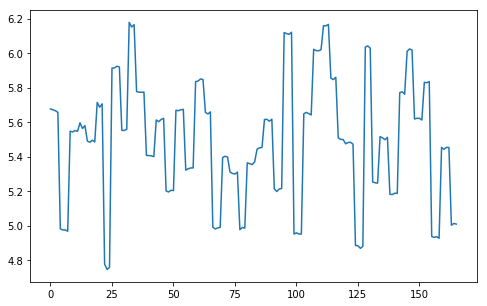

In [5]:
col = "Ic_var"
plt.figure(figsize = (8,5))
plt.plot(all_feature_df[col].values)
# plt.savefig("./picture/IGBT4_1_edge_down_features/"+col+".jpg" )


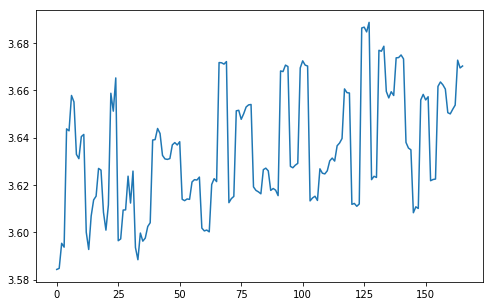

In [8]:
col = "Vce_mean"
plt.figure(figsize = (8,5))
plt.plot(all_feature_df[col].values)
# plt.savefig("./picture/IGBT4_1_edge_down_features/"+col+".jpg" )


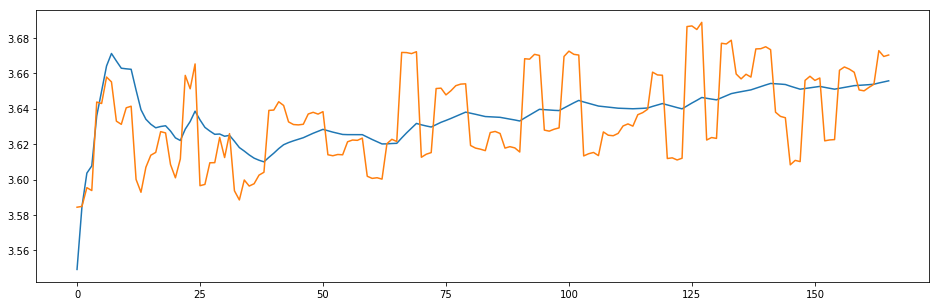

In [9]:
from mylab.myfilter.myfilter import FirstOrderKF
from mylab.myfilter.myfilter import myKalmanFilter
# filter the data
# get zs (measured/sensor data)
zs = all_feature_df[col].values
# kanlman filter
R, Q = 1, 1e-10
Kalman_filter = FirstOrderKF(R, Q, dt=1)
# Kalman_filter = SecondOrderKF(R, Q, 1, P=1)
zs_filtered, err = myKalmanFilter(Kalman_filter,zs )
# plot 
plt.figure(figsize = (16,5))

plt.plot(zs_filtered)
plt.plot(zs)

In [13]:
df = pd.read_csv("./data/IGBT4_1_edge_down/2020-07-31-06-03-36 0.csv")
df.head()

Vge   Vce    Ig    Ic
0  2.9  0.16  0.04  0.08
1  2.9  0.16  0.04  0.08
2  2.9  0.16  0.08  0.08
3  2.9  0.16  0.04  0.08
4  2.9  0.16  0.04  0.08

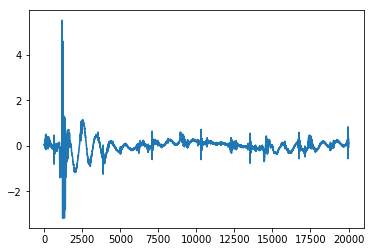

In [14]:
df.Ig.plot()

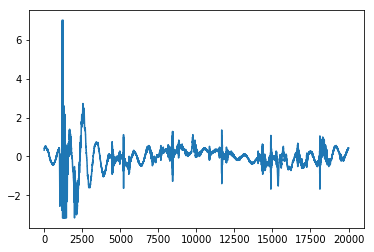

In [15]:
df = pd.read_csv("./data/IGBT4_1_edge_down/2020-07-30-06-10-40 0.csv")
df.Ig.plot()

In [ ]:
=

### up edge

In [47]:
from mylab.feature.myfeature import cal_feature

file_base_dir = "./data/IGBT3_1/"
file_child_dir = "edge_up/"
# file_name = "2020-01-08-20-47 (1).csv"
# file = file_base_dir+file_child_dir+file_name
data_len = 64

all_feature_df = pd.DataFrame()
for _,_,filenames in os.walk( file_base_dir+file_child_dir ):
    for file_name in filenames:
        file = file_base_dir+file_child_dir+file_name
        up_edge_df = pd.read_csv(file, names = ["num","Vce","Vge"],header = 0)
        if up_edge_df.shape[0]==data_len: # use the full data only
            feature_df1 = cal_feature(up_edge_df,"Vce")
            feature_df2 = cal_feature(up_edge_df,"Vge")
            feature_df = pd.concat([feature_df1,feature_df2],axis = 1)
            feature_df["file_name"] = file_name
            feature_df["time"] = file_name[:16]
            feature_df["time_stamp"] = time.mktime(time.strptime(file_name[:16],"%Y-%m-%d-%H-%M"))
            all_feature_df = pd.concat([all_feature_df,feature_df],axis = 0)

all_feature_df.to_csv("./temp/edge_up_features.csv",index = False)
print(all_feature_df.shape)
all_feature_df.head()

(183, 55)


Vce_min  Vce_max  Vce_range  Vce_mean  Vce_mode  Vce_median  \
0      0.2      5.8        5.6   1.58125       0.2         0.6   
0      0.2      6.2        6.0   1.61875       0.6         0.6   
0      0.2      5.8        5.6   1.59375       0.6         0.6   
0      0.2      5.8        5.6   1.60000       0.6         0.6   
0     -0.2      6.2        6.4   1.35000       0.2         0.2   

   Vce_quantile25  Vce_quantile75   Vce_std   Vce_var      ...         Vge_sf  \
0             0.2             0.6  2.257044  5.094246      ...       1.040097   
0             0.2             0.6  2.252538  5.073929      ...       1.040674   
0             0.2             0.6  2.251481  5.069167      ...       1.040826   
0             0.2             0.6  2.232231  4.982857      ...       1.042660   
0             0.1             0.6  2.399471  5.757460      ...       1.039387   

     Vge_MI    Vge_CF   Vge_llr    Vge_pi  Vge_sdif  Vge_cpt1  \
0  1.947733  1.817234 -7.888440  1.618483  0.698750  1.293167   
0  1.931148  1.801339 -7.803995  1.615457  0.697984  1.292752   
0  1.934784  1.803696 -7.309093  1.610438  0.694176  1.295186   
0  1.926233  1.785642 -6.947239  1.578785  0.690292  1.284155   
0  1.958337  1.826307 -8.925459  1.644626  0.704264  1.305558   

                    file_name              time    time_stamp  
0  2020-01-08-20-47 (1)_0.csv  2020-01-08-20-47  1.578488e+09  
0  2020-01-08-20-47 (1)_1.csv  2020-01-08-20-47  1.578488e+09  
0  2020-01-08-20-47 (1)_2.csv  2020-01-08-20-47  1.578488e+09  
0  2020-01-08-20-47 (1)_3.csv  2020-01-08-20-47  1.578488e+09  
0  2020-01-08-20-47 (2)_0.csv  2020-01-08-20-47  1.578488e+09  

[5 rows x 55 columns]

In [49]:
for col in all_feature_df.columns:
    if col[0]=="V":
        plt.figure(figsize = (8,5))
        plt.plot(all_feature_df[col].values)
        plt.savefig("./picture/edge_up_features/"+col+".jpg" )
        plt.close()